In [1]:
import sys
sys.path.append('../')

import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

from csbdeep.utils import normalize
from glob import glob
from skimage import io
from stardist.matching import matching_dataset
from stardist.models import StarDist2D
from tqdm import tqdm

from utils import save_scores_csv, show_test_images, taus

In [2]:
image_dir = '/storage/annajiwons/images'
merfish_dir = f'{image_dir}/merfish'

model_dir = './models'

In [3]:
# 8 images (20%) chosen for test
merfish_X_test_names = sorted(glob(f'{merfish_dir}/test/images/*.tif'))
merfish_X_test = [normalize(img, 1, 99.8, axis=(0, 1)) for img in list(map(io.imread, merfish_X_test_names))]
merfish_Y_test_names = sorted(glob(f'{merfish_dir}/test/masks/*.tif'))
merfish_Y_test = list(map(io.imread, merfish_Y_test_names))

# 5 Additional Images

In [4]:
# Load 5 additional images model from disk
pretrained_add5_model = StarDist2D(None, name='2D_versatile_fluo_5', basedir=model_dir) 

Loading network weights from 'weights_best.h5'.
Couldn't load thresholds from 'thresholds.json', using default values. (Call 'optimize_thresholds' to change that.)
Using default values: prob_thresh=0.5, nms_thresh=0.4.


In [5]:
pretrained_add5_Y_pred = [pretrained_add5_model.predict_instances(x, n_tiles=pretrained_add5_model._guess_n_tiles(x), show_tile_progress=False)
              for x in tqdm(merfish_X_test)]

100%|██████████| 8/8 [02:31<00:00, 18.96s/it]


In [6]:
pretrained_add5_Y_pred_labels = [pred[0] for pred in pretrained_add5_Y_pred]
pretrained_add5_stats = [matching_dataset(merfish_Y_test, pretrained_add5_Y_pred_labels, thresh=t, show_progress=False) for t in tqdm(taus)]

100%|██████████| 9/9 [00:35<00:00,  3.90s/it]


In [7]:
pretrained_add5_stats

[DatasetMatching(criterion='iou', thresh=0.1, fp=1, tp=42, fn=1, precision=0.9767441860465116, recall=0.9767441860465116, accuracy=0.9545454545454546, f1=0.9767441860465116, n_true=43, n_pred=43, mean_true_score=0.8063162594809103, mean_matched_score=0.8255142656590273, panoptic_quality=0.8063162594809103, by_image=False),
 DatasetMatching(criterion='iou', thresh=0.2, fp=1, tp=42, fn=1, precision=0.9767441860465116, recall=0.9767441860465116, accuracy=0.9545454545454546, f1=0.9767441860465116, n_true=43, n_pred=43, mean_true_score=0.8063162594809103, mean_matched_score=0.8255142656590273, panoptic_quality=0.8063162594809103, by_image=False),
 DatasetMatching(criterion='iou', thresh=0.3, fp=1, tp=42, fn=1, precision=0.9767441860465116, recall=0.9767441860465116, accuracy=0.9545454545454546, f1=0.9767441860465116, n_true=43, n_pred=43, mean_true_score=0.8063162594809103, mean_matched_score=0.8255142656590273, panoptic_quality=0.8063162594809103, by_image=False),
 DatasetMatching(criterio

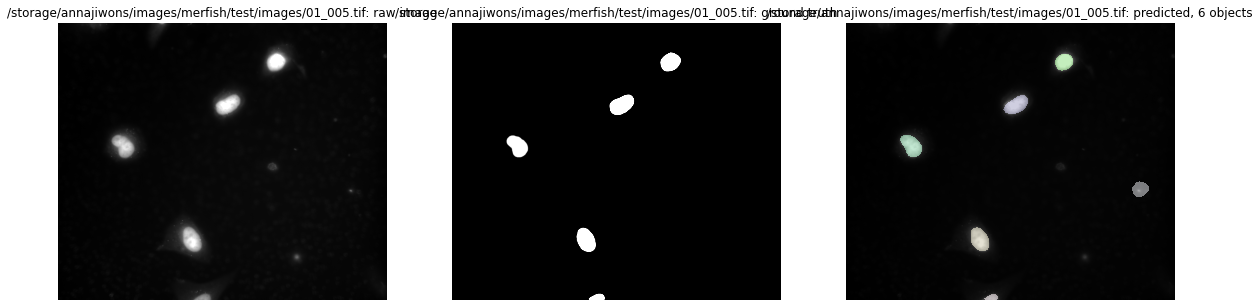

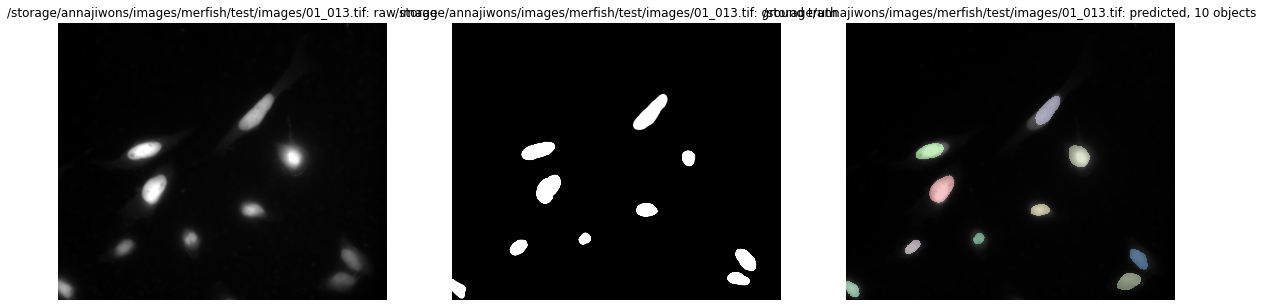

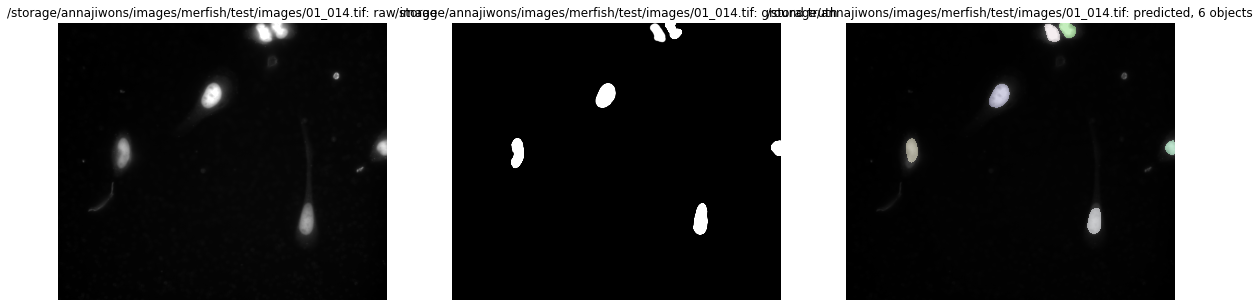

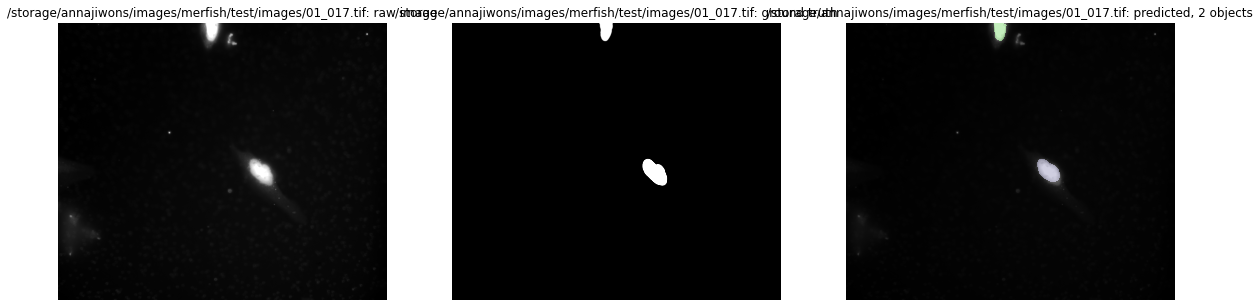

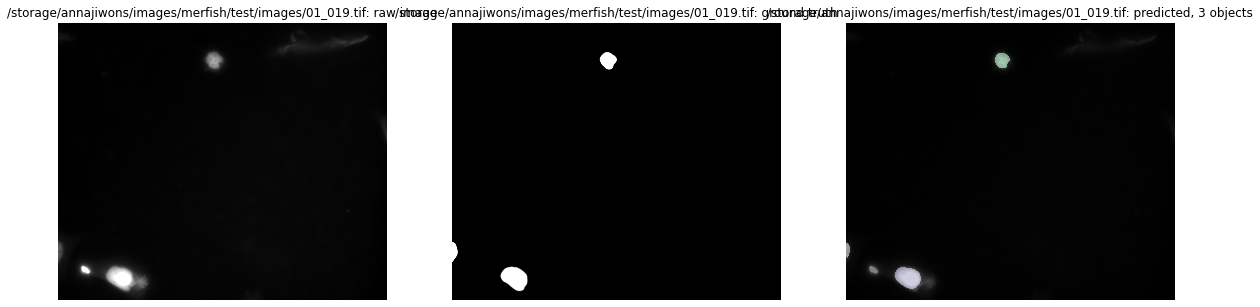

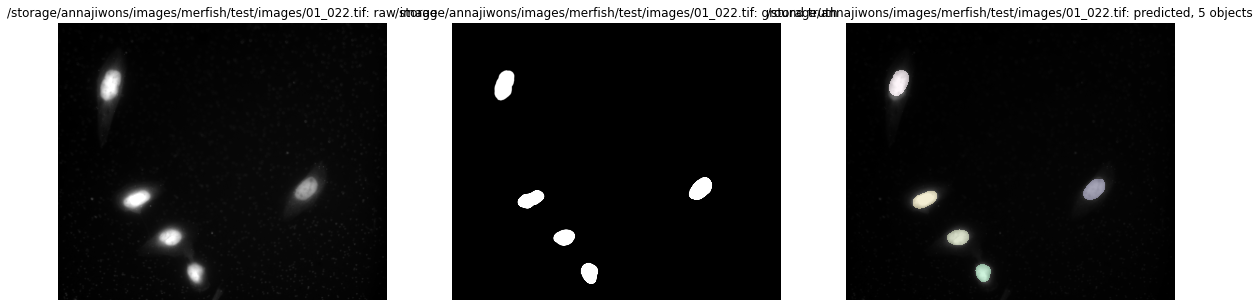

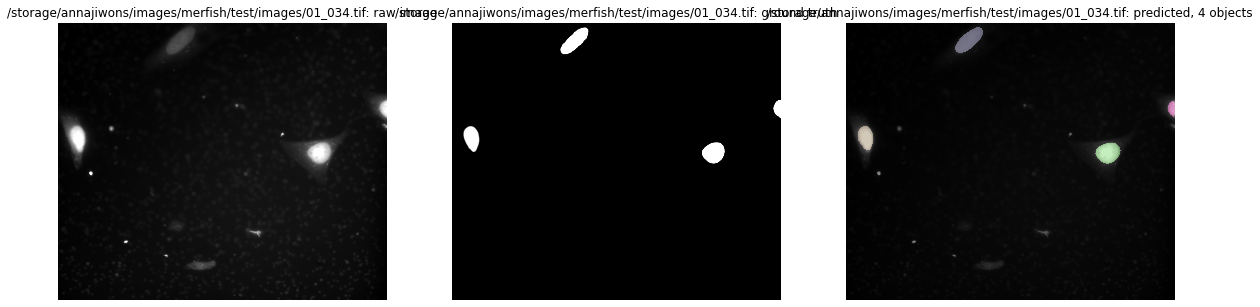

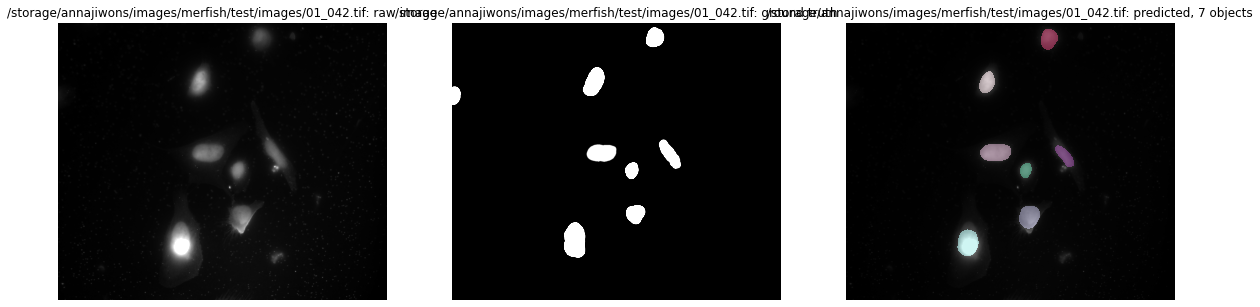

In [8]:
show_test_images(merfish_X_test, merfish_Y_test, pretrained_add5_Y_pred, merfish_X_test_names)

In [9]:
save_scores_csv(pretrained_add5_stats, '_add5')

In [9]:
cv.imwrite('model2.tif', pretrained_add5_Y_pred[1][0])

True

# 10 Additional Images

In [10]:
# Load 10 additional images model from disk
pretrained_add10_model = StarDist2D(None, name='2D_versatile_fluo_10', basedir=model_dir) 

Loading network weights from 'weights_best.h5'.
Couldn't load thresholds from 'thresholds.json', using default values. (Call 'optimize_thresholds' to change that.)
Using default values: prob_thresh=0.5, nms_thresh=0.4.


In [11]:
pretrained_add10_Y_pred = [pretrained_add10_model.predict_instances(x, n_tiles=pretrained_add10_model._guess_n_tiles(x), show_tile_progress=False)
              for x in tqdm(merfish_X_test)]

100%|██████████| 8/8 [02:52<00:00, 21.54s/it]


In [12]:
pretrained_add10_Y_pred_labels = [pred[0] for pred in pretrained_add10_Y_pred]
pretrained_add10_stats = [matching_dataset(merfish_Y_test, pretrained_add10_Y_pred_labels, thresh=t, show_progress=False) for t in tqdm(taus)]

100%|██████████| 9/9 [01:01<00:00,  6.83s/it]


In [13]:
pretrained_add10_stats

[DatasetMatching(criterion='iou', thresh=0.1, fp=0, tp=42, fn=1, precision=1.0, recall=0.9767441860465116, accuracy=0.9767441860465116, f1=0.9882352941176471, n_true=43, n_pred=42, mean_true_score=0.8156401119025591, mean_matched_score=0.8350601145669058, panoptic_quality=0.8252358779249421, by_image=False),
 DatasetMatching(criterion='iou', thresh=0.2, fp=0, tp=42, fn=1, precision=1.0, recall=0.9767441860465116, accuracy=0.9767441860465116, f1=0.9882352941176471, n_true=43, n_pred=42, mean_true_score=0.8156401119025591, mean_matched_score=0.8350601145669058, panoptic_quality=0.8252358779249421, by_image=False),
 DatasetMatching(criterion='iou', thresh=0.3, fp=0, tp=42, fn=1, precision=1.0, recall=0.9767441860465116, accuracy=0.9767441860465116, f1=0.9882352941176471, n_true=43, n_pred=42, mean_true_score=0.8156401119025591, mean_matched_score=0.8350601145669058, panoptic_quality=0.8252358779249421, by_image=False),
 DatasetMatching(criterion='iou', thresh=0.4, fp=0, tp=42, fn=1, preci

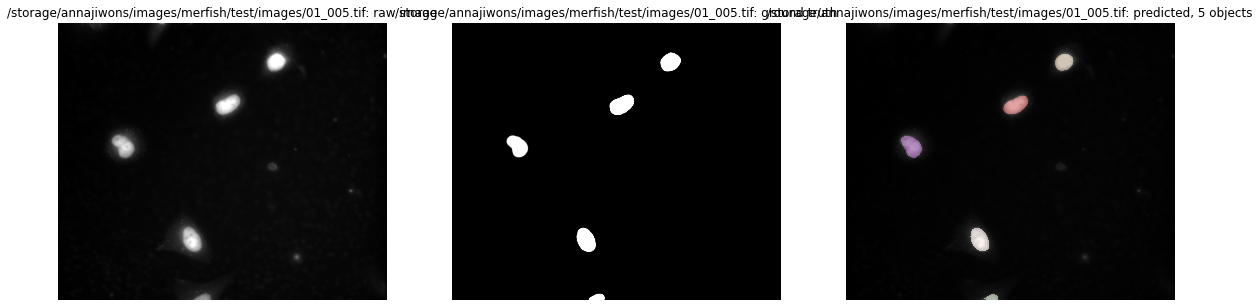

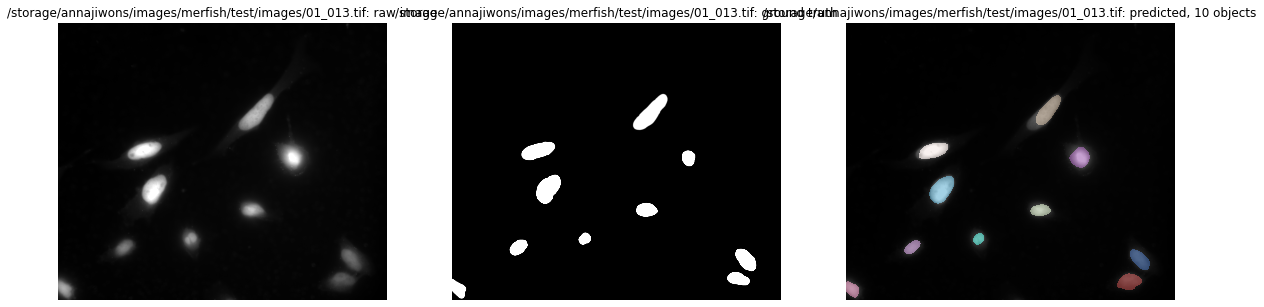

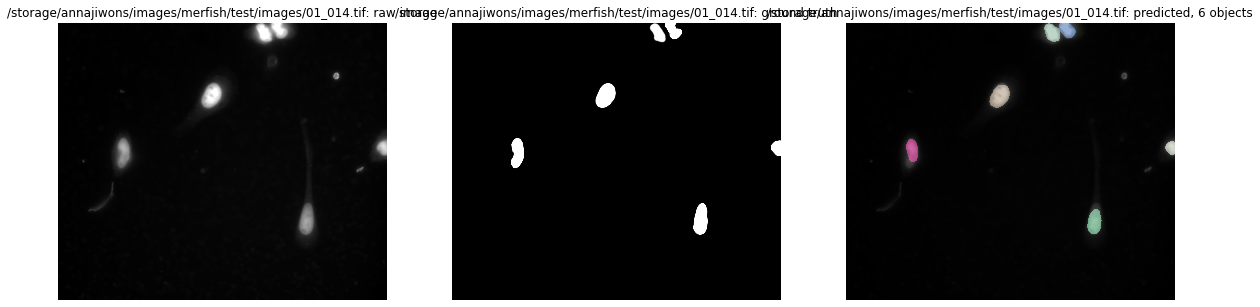

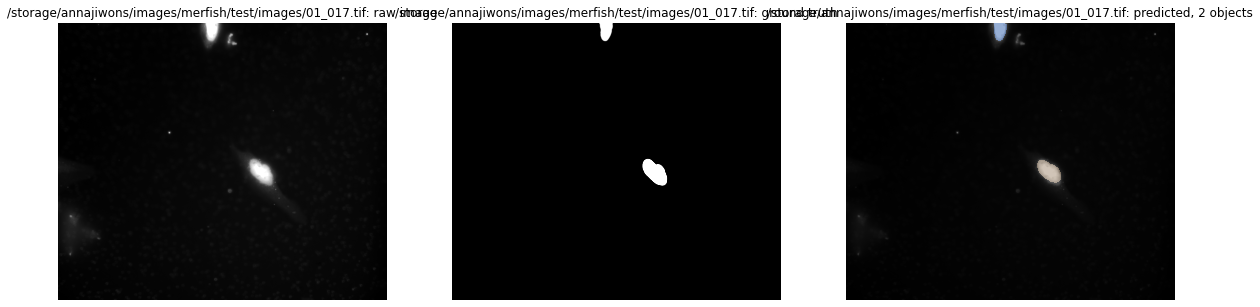

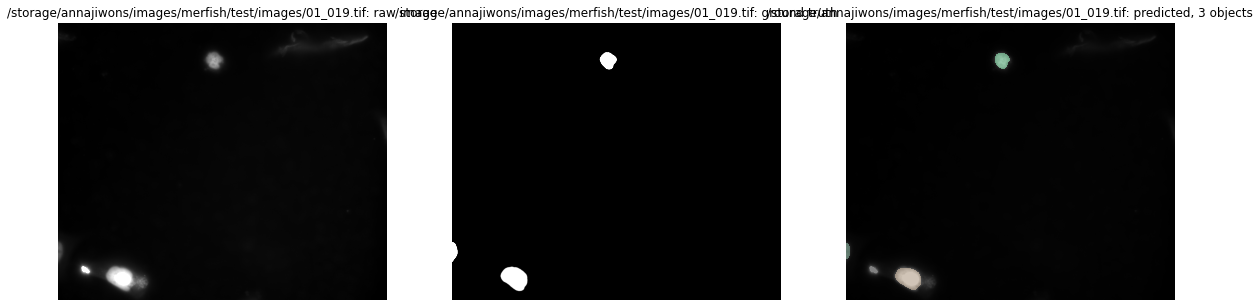

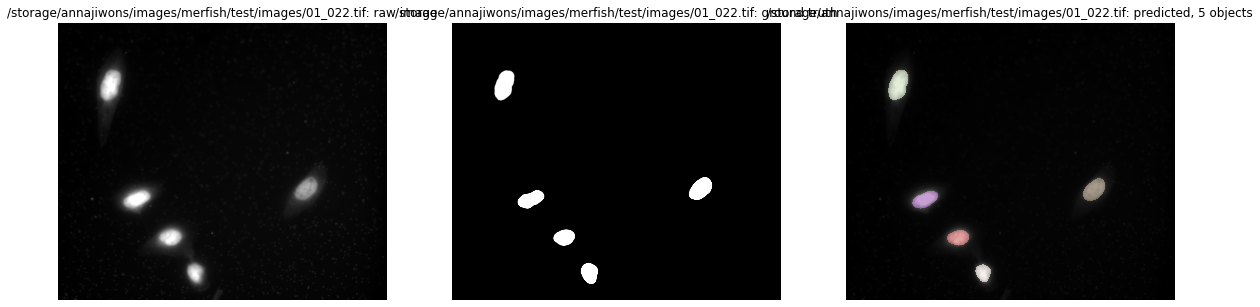

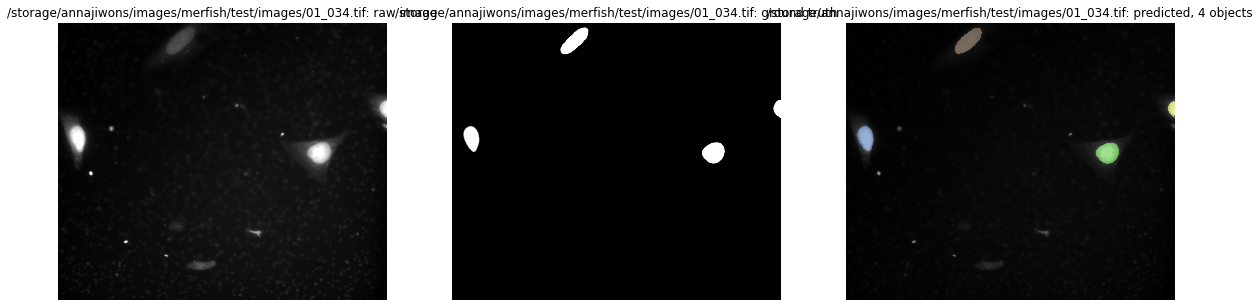

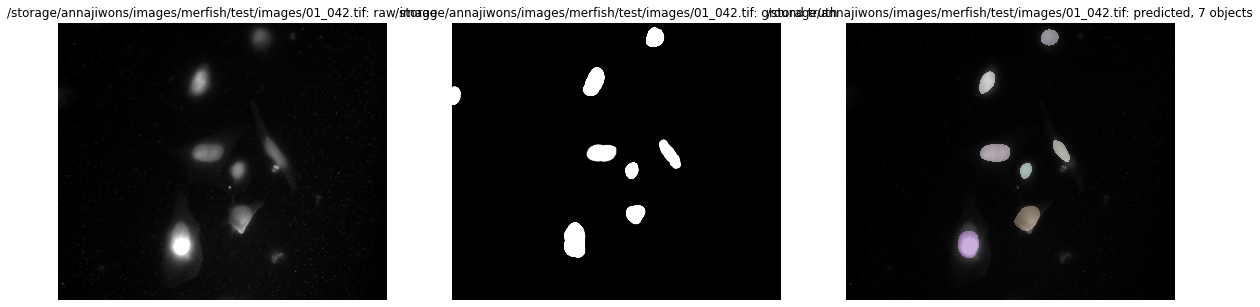

In [14]:
show_test_images(merfish_X_test, merfish_Y_test, pretrained_add10_Y_pred, merfish_X_test_names)

In [15]:
save_scores_csv(pretrained_add10_stats, '_add10')

In [15]:
cv.imwrite('model3.tif', pretrained_add5_Y_pred[1][0])

True